## Вариант 5

# Задание 1

Возьмем стандартный датасет из `seaborn` - `taxis`. Необходимо выполнить одну визуализацию на `pandas` и одну на `R`. Для визуализации на `R` данные возьмите отсюда: https://github.com/mwaskom/seaborn-data/blob/master/taxis.csv.

Датасет содержит данные о поездках на такси в Нью-Йорке за 2019 год. Столбцы следующие (возможны опечатки, будьте внимательны):
* `pickup` – время начала поездки
* `dropoff` – время окончания поездки
* `passengers` – количество пассажиров
* `distance` – расстояние поездки
* `fare` – стоимость поездки
* `tip` – чаевые
* `tolls` – штраф
* `total` – общая стоимость поездки
* `color` – цвет такси
* `payment` – способ оплаты
* `pickup_zone` – район начала поездки
* `dropoff_zone` – район окончания поездки
* `pickup_borough` – боро начала поездки
* `dropoff_borough` – боро окончания поездки

Подробнее про данные: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [ ]:
#импорты
library(dplyr)
library(ggplot2)

In [ ]:
#наша таблица
taxis <- read.csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv')
head(taxis)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
2,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
3,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
4,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
5,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
6,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan


8. Покажите топ-3 самых популярных маршрутов внутри каждого боро. Направление маршрута не учитывыаем. Разместите графики в одном окне вывода.

In [ ]:
#отбираем нужные боро
boro <- taxis[taxis$pickup_borough == taxis$dropoff_borough,]
boro <- boro[, c(11,12,13)]
names(boro)[names(boro) == "pickup_borough"] <- "boro"
#считаем маршруты внутри каждого боро
trips <- boro %>% group_by(pickup_zone, dropoff_zone) %>% count(boro)
trips <- trips[-1,]
trips

pickup_zone,dropoff_zone,boro,n
<chr>,<chr>,<chr>,<int>
Allerton/Pelham Gardens,Co-Op City,Bronx,1
Alphabet City,East Village,Manhattan,1
Alphabet City,Greenwich Village North,Manhattan,1
Alphabet City,Greenwich Village South,Manhattan,1
Alphabet City,Kips Bay,Manhattan,1
Alphabet City,Stuy Town/Peter Cooper Village,Manhattan,1
Alphabet City,West Village,Manhattan,1
Astoria,Astoria,Queens,24
Astoria,East Elmhurst,Queens,2


In [ ]:
#список всех боро
unique(trips$boro)

[1] "Bronx"     "Manhattan" "Queens"    "Brooklyn"

In [ ]:
#топ-3 в Manhattan
trips_manhattan <- trips[trips$boro == 'Manhattan',]
top3_manh_trips <- head(trips_manhattan[order(trips_manhattan$n, decreasing=TRUE),], n = 4)
top3_manh_trips <- top3_manh_trips[-3,] #убираем повторяющийся маршрут
#топ-3 в Bronx
trips_bronx <- trips[trips$boro == 'Bronx',]
top3_bronx_trips <- head(trips_bronx[order(trips_bronx$n, decreasing=TRUE),], n = 3)
#топ-3 в Queens
trips_queens <- trips[trips$boro == 'Queens',]
top3_queens_trips <- head(trips_queens[order(trips_queens$n, decreasing=TRUE),], n = 3)
#топ-3 в Brooklyn
trips_brooklyn <- trips[trips$boro == 'Brooklyn',]
top3_brooklyn_trips <- head(trips_brooklyn[order(trips_brooklyn$n, decreasing=TRUE),], n = 3)
#делаем одну таблицу с лучшими маршрутами
top_df <- top3_manh_trips
new_row1 <- top3_bronx_trips[c(1,2,3),]
new_row2 <- top3_queens_trips[c(1,2,3),]
new_row3 <- top3_brooklyn_trips[c(1,2,3),]
top_df <- rbind(top_df, new_row1)
top_df <- rbind(top_df, new_row2)
top_df <- rbind(top_df, new_row3)
top_df

pickup_zone,dropoff_zone,boro,n
<chr>,<chr>,<chr>,<int>
Upper East Side North,Upper East Side North,Manhattan,38
Upper East Side South,Upper East Side North,Manhattan,30
Central Harlem,Central Harlem North,Manhattan,20
East Concourse/Concourse Village,West Concourse,Bronx,2
East Concourse/Concourse Village,Westchester Village/Unionport,Bronx,2
Melrose South,East Concourse/Concourse Village,Bronx,2
Astoria,Astoria,Queens,24
JFK Airport,JFK Airport,Queens,10
Astoria,Old Astoria,Queens,9


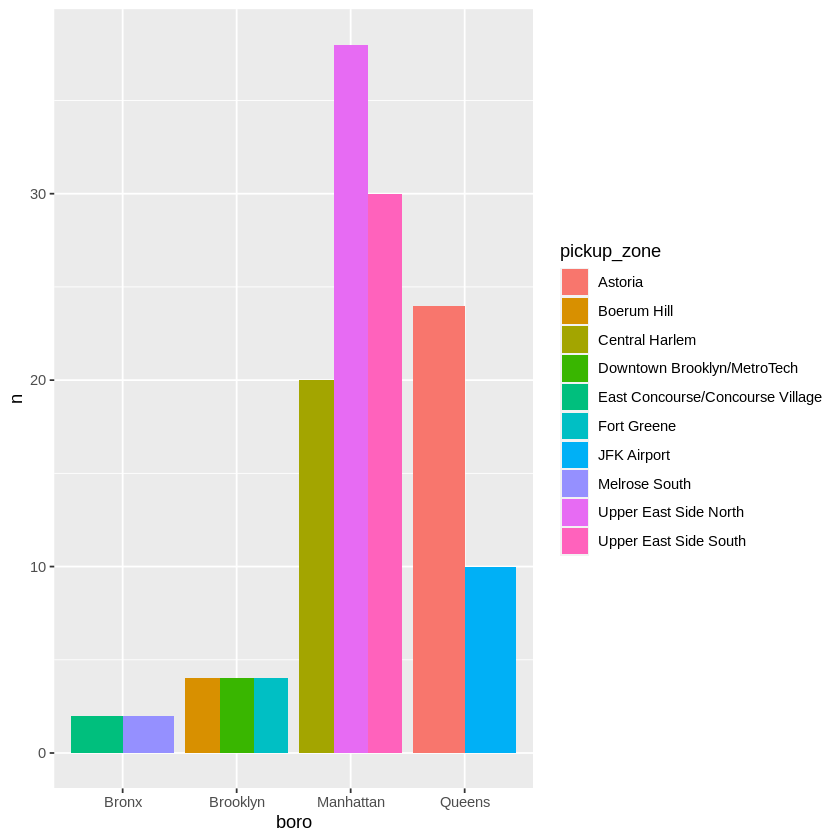

In [ ]:
#визуализация
ggplot(top_df, aes(fill=pickup_zone, y=n, x=boro)) + 
    geom_bar(position="dodge", stat="identity")

# Задание 2


Воспользуемся стандартным датасетом `titanic`. Загрузим его из модуля `seaborn`. Необходимо выполнить одну визуализацию на `pandas` и одну на `R`. Для визуализации на `R` данные возьмите отсюда: https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv

In [ ]:
#наша таблица
titanic <- read.csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
head(titanic)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,3,male,22,1,0,7.2500,S,Third,man,True,,Southampton,no,False
2,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,3,female,26,0,0,7.9250,S,Third,woman,False,,Southampton,yes,True
4,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,35,0,0,8.0500,S,Third,man,True,,Southampton,no,True
6,0,3,male,NA,0,0,8.4583,Q,Third,man,True,,Queenstown,no,True


3. На диаграмме с группировкой покажите, кого было больше в каждой возрастной группе: выживших или погибших? Возрастной группой считаем каждые десять лет: 0-10, 11-20, 21-30 и т.д.

In [ ]:
#отбираем нужные данные
titanic_stat <- titanic[,c(3,4,14)]
titanic_stat <- na.omit(titanic_stat) #удаляем нулевые значения
#классификация категорий
titanic_stat['age_category'] <- 0
for (i in 1:length(titanic_stat$age)){
  if  (0 <= titanic_stat$age[i]  & titanic_stat$age[i] <= 10) {
      titanic_stat$age_category[i] <- 1
  } else if (11 <= titanic_stat$age[i]  & titanic_stat$age[i] <= 20){
      titanic_stat$age_category[i] <- 2
  } else if (21 <= titanic_stat$age[i]  & titanic_stat$age[i] <= 30){
      titanic_stat$age_category[i] <- 3 
  } else if (31 <= titanic_stat$age[i]  & titanic_stat$age[i] <= 40){
      titanic_stat$age_category[i] <- 4
  } else if (41 <= titanic_stat$age[i]  & titanic_stat$age[i] <= 50){
      titanic_stat$age_category[i] <- 5
  } else if (51 <= titanic_stat$age[i]  & titanic_stat$age[i] <= 60){
      titanic_stat$age_category[i] <- 6
  } else if (61 <= titanic_stat$age[i]  & titanic_stat$age[i] <= 70){
      titanic_stat$age_category[i] <- 7
  } else{
     titanic_stat$age_category[i] <- 8
  }
}
head(titanic_stat)

,sex,age,alive,age_category
,<chr>,<dbl>,<chr>,<dbl>
1,male,22,no,3
2,female,38,yes,4
3,female,26,yes,3
4,female,35,yes,4
5,male,35,no,4
7,male,54,no,6


In [ ]:
#таблица для визуализации
alive <- titanic_stat[titanic_stat$alive == 'yes',]
no_alive <- titanic_stat[titanic_stat$alive == 'no',]
df_alive <- alive %>% group_by(age_category) %>% count(alive)
df_no_alive <- no_alive %>% group_by(age_category) %>% count(alive)
new_row <- df_no_alive[c(1,2,3,4,5,6,7,8),]
df_alive <- rbind(df, new_row)
names(df_alive)[names(df_alive) == "n"] <- "number"
df_alive

age_category,alive,number
<dbl>,<chr>,<int>
1,yes,38
2,yes,44
3,yes,84
4,yes,69
5,yes,33
6,yes,17
7,yes,4
8,yes,1
1,no,26


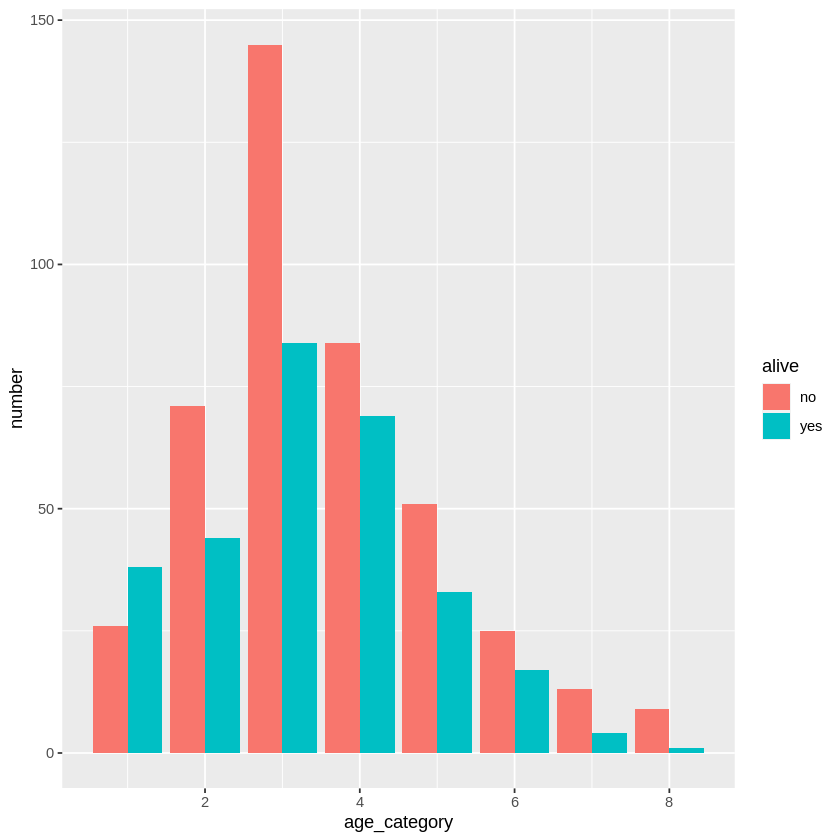

In [ ]:
ggplot(df_alive, aes(fill=alive, y= number, x=age_category)) + 
    geom_bar(position="dodge", stat="identity")